# Sales Prediction

**Adding the project directory to thse system path**

In [1]:
import pandas as pd
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [2]:
from script.data_preprocessing import Preprocessor
from script.model import Modelling

**Instantiate the the class**

In [3]:
processor=Preprocessor()

**Loading the csv data to a pandas dataframe**

In [4]:
train_df=pd.read_csv("data\\train.csv",low_memory=False)

In [5]:
store_df=pd.read_csv("data\\store.csv")

**Handling outliers**
* *Imputing outliers of 'Sales' and 'Customers' features of train data with mean*

In [6]:
processor.replace_outliers_with_mean(train_df)

2024-09-24 09:58:33,796 - INFO - replace outliers of Sales and Customer


**Handling missing values**

In [7]:
processor.handle_missing_values(store_df)

2024-09-24 09:58:34,332 - INFO - handle missing values


**Merging the store data with the train data to get more features about each stores**

In [8]:
merged_df = pd.merge(train_df, store_df, on="Store", how="left")

In [9]:
processed_data=merged_df.drop(merged_df.index[100000:])

**Feature Engineering:** Create new features from the existing data, especially focusing on the Date column and other relevant columns.Features added:
1. 'Month'
2. 'IsWeekend'
3. 'IsBeginningOfMonth'
4. 'IsMidMonth'
5. 'IsEndOfMonth'
6. 'DaysToHoliday'
7. 'DaysAfterHoliday'

In [10]:
processed_data=processor.feature_engineering(processed_data)

2024-09-24 09:58:34,646 - INFO - feature engineering


### **Encoding:** Convert categorical variables to numerical values using techniques like label encoding or one-hot encoding.
1. **'DayOfWeek' and 'Month':** Cyclic Encoding (Sine and Cosine Transformation).To capture the cyclic nature of the week (since day 1 is close to day 7),  transform the 'DayOfWeek' using sine and cosine transformations.
2. **'StoreType','Assortment' and 'PromoInterval':** Use pandas.get_dummies() to transform these categorical columns into separate binary columns for each category. 
3. **StateHoliday:** encode the StateHoliday column such that it maps 0 to 0 and a, b, c to 1


In [11]:
processed_data=processor.encode_categorical(processed_data)

### **Scaling**
**MinMax Scaler (Normalization):**
 It scales and translates data to a fixed range, typically [0, 1], or some other range you specify.Useful for algorithms sensitive to the scale of the data like neural networks, k-nearest neighbors (KNN), and gradient descent-based models (linear/logistic regression, etc.).When used in deep learning, it helps avoid exploding or vanishing gradients.
 
 **List of columns to scale:**'Sales', 'Customers','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','DaysToHoliday','DaysAfterHoliday'


In [12]:
processor.scale_data(processed_data)

## Modelling
1. Direct Model Training: The full_pipeline function now directly splits the data into training and test sets, trains the model, and evaluates it.

2. RandomForestRegressor: The model is still a RandomForestRegressor from sklearn, as it's a solid choice for regression problems, especially when you have already preprocessed features.

3. Model Evaluation: The same metrics (MSE, MAE, and R^2) are used to evaluate the model’s performance on the test set.

In [13]:
#instantiate class
modellig=Modelling()

Because of computational capacity rows are reduced

In [14]:
# processed_data_reduced=processed_data.drop(processed_data.index[10000:])

**Implement the prediction using the full_pipeline function**

In [15]:
X,y,model,importance,feature_names=modellig.full_pipeline(processed_data,'Sales')

2024-09-24 09:59:02,414 - INFO - Full pipeline to train a RandomForestRegressor and evaluate it.
2024-09-24 09:59:02,470 - INFO - Creates and returns a RandomForestRegressor model.
2024-09-24 10:00:46,152 - INFO - Evaluates the model


Mean Squared Error (MSE): 0.00016098726482377515
Mean Absolute Error (MAE): 0.008178503539196238
R^2 Score: 0.9812854808338899


### Feature importance

For feature importance, Random Forest  provides inherent feature importance scores based on the contribution of each feature in reducing the prediction error.

2024-09-24 10:00:46,184 - INFO - feature importance


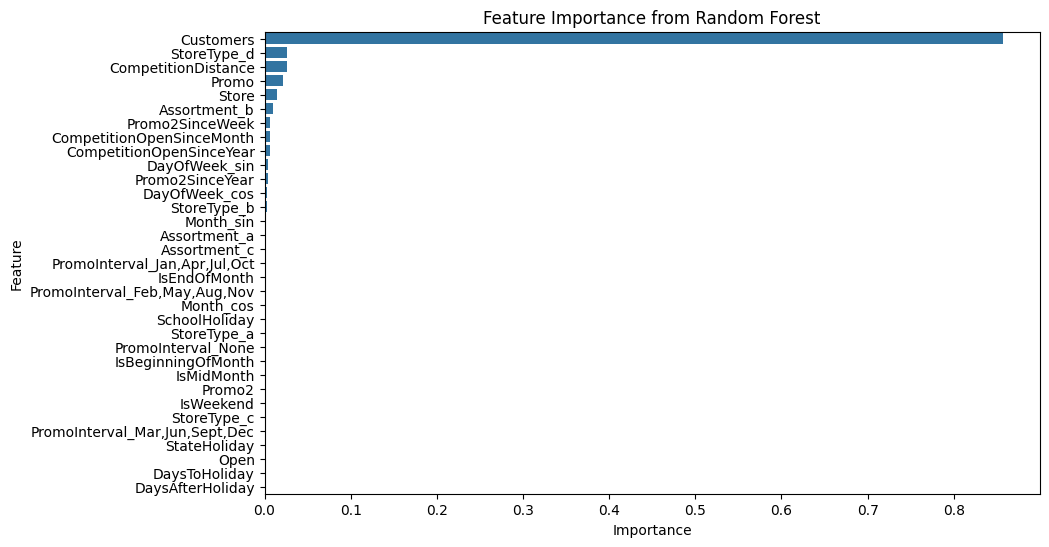

,Feature,Importance
1,Customers,0.856772
25,StoreType_d,0.025731
6,CompetitionDistance,0.025571
3,Promo,0.021072
0,Store,0.014625
27,Assortment_b,0.009956
10,Promo2SinceWeek,0.006727
7,CompetitionOpenSinceMonth,0.006406
8,CompetitionOpenSinceYear,0.006038
18,DayOfWeek_sin,0.003986


In [16]:
modellig.get_feature_importance(X,importance,feature_names)

### Estimating Confidence Intervals
To estimate confidence intervals creatively, we can use bootstrapping. This involves repeatedly sampling the data with replacement, training multiple models, and evaluating the variability in predictions.

In [ ]:
modellig.bootstrap_confidence_interval(X, y, model, n_iterations=100, ci=95)
